In [2]:
pip install matplotlib scikit-learn pandas numpy


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: C:\Users\jaysh\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 2.8 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.1 MB 3.5 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/8.1 MB 3.6 MB/s eta 0:00:02
   -------------------- ------------------- 4.2/8.1 MB 3.9 MB/s eta 0:00:02
   ------------------------ --------------- 5.0/8.1 MB 3.9 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 4.1 MB/s eta 0:00:01
   ------------------------------ --------- 6.3/8.1 MB 4.1 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 3.4 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 3.6 MB/s eta 0:00:00
   -----------------------------

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.shape

(200, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

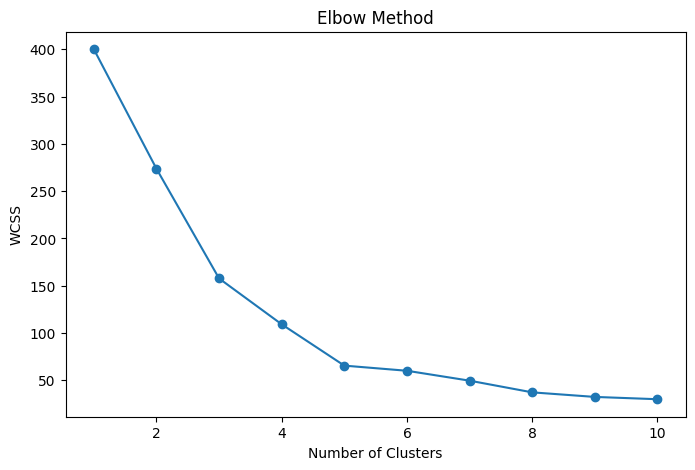

In [12]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

data['Cluster'] = clusters
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


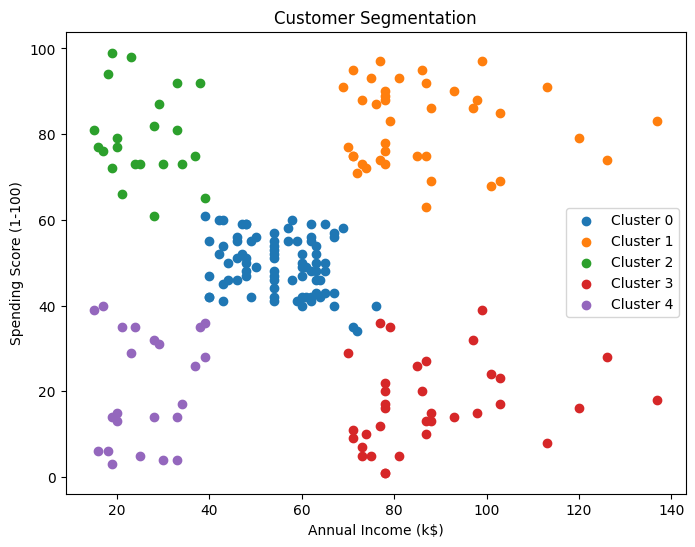

In [14]:
plt.figure(figsize=(8,6))

for i in range(5):
    plt.scatter(
        data[data['Cluster'] == i]['Annual Income (k$)'],
        data[data['Cluster'] == i]['Spending Score (1-100)'],
        label=f'Cluster {i}'
    )

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation')
plt.legend()
plt.show()

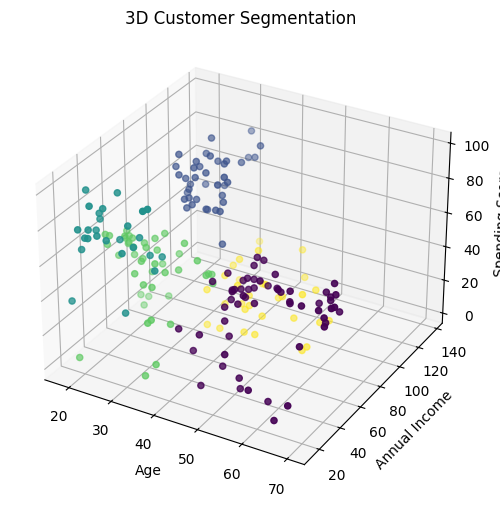

In [15]:
from mpl_toolkits.mplot3d import Axes3D

X3 = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X3_scaled = scaler.fit_transform(X3)

kmeans3 = KMeans(n_clusters=5, random_state=42)
clusters3 = kmeans3.fit_predict(X3_scaled)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    data['Age'],
    data['Annual Income (k$)'],
    data['Spending Score (1-100)'],
    c=clusters3
)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.title('3D Customer Segmentation')
plt.show()